In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

### Load Dataset

In [4]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 23s 0us/step


In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
y_test.shape

(10000, 1)

In [11]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [14]:
# converting y_train and y_test to 1D array
y_train = y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [15]:
y_test = y_test.reshape(-1)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [16]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [19]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

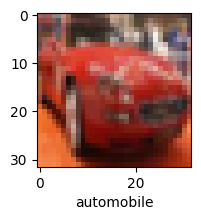

In [21]:
plot_sample(X_train, y_train, 5)

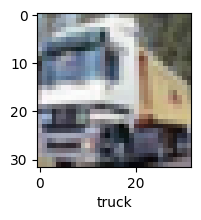

In [22]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

## Normalizing the training data

In [23]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## Buliding simple ANN for image classification 

In [24]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)



Epoch 1/5


1563/1563 [==============================] - 57s 36ms/step - loss: 1.8133 - accuracy: 0.3568
Epoch 2/5
1563/1563 [==============================] - 55s 35ms/step - loss: 1.6242 - accuracy: 0.4272
Epoch 3/5
1563/1563 [==============================] - 55s 35ms/step - loss: 1.5425 - accuracy: 0.4558
Epoch 4/5
1563/1563 [==============================] - 55s 35ms/step - loss: 1.4827 - accuracy: 0.4767
Epoch 5/5
1563/1563 [==============================] - 57s 37ms/step - loss: 1.4330 - accuracy: 0.4960


#### Accuracy is too low by using ANN for image classification (49%)

In [27]:
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

313/313 [==============================] - 3s 10ms/step


In [28]:
from sklearn.metrics import confusion_matrix , classification_report
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.45      0.53      1000
           1       0.55      0.71      0.62      1000
           2       0.47      0.21      0.29      1000
           3       0.33      0.34      0.34      1000
           4       0.58      0.24      0.34      1000
           5       0.30      0.52      0.38      1000
           6       0.47      0.61      0.53      1000
           7       0.52      0.57      0.54      1000
           8       0.55      0.69      0.61      1000
           9       0.62      0.44      0.52      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



## Now let's use convolutional neural network 

In [29]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [30]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.4923 - accuracy: 0.4607
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1405 - accuracy: 0.5987
Epoch 3/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.0039 - accuracy: 0.6487
Epoch 4/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9172 - accuracy: 0.6814
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8503 - accuracy: 0.7058
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8031 - accuracy: 0.7219
Epoch 7/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.7580 - accuracy: 0.7386
Epoch 8/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.7202 - accuracy: 0.7494
Epoch 9/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6853 - accuracy: 0.7611
Epoch 10/10
1563/1563 [==============================] - 16s 10m

#### With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives high accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features. 

In [32]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.9403 - accuracy: 0.6876


[0.9403038024902344, 0.6876000165939331]

In [33]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 7ms/step


array([[6.2566623e-04, 5.2807078e-05, 2.5392279e-03, 9.3690628e-01,
        1.5949414e-04, 5.1917754e-02, 1.4379814e-03, 1.7046583e-05,
        6.3356012e-03, 8.1084127e-06],
       [3.4187082e-04, 4.9079740e-01, 1.7331934e-07, 4.9390543e-08,
        2.2875166e-07, 1.2108857e-10, 8.7999634e-12, 7.7271565e-08,
        5.0882792e-01, 3.2284854e-05],
       [4.9658705e-02, 6.6462889e-02, 4.1705943e-03, 7.6867989e-03,
        3.9992118e-03, 4.1681409e-04, 6.8758556e-05, 6.9091786e-03,
        8.5039037e-01, 1.0236616e-02],
       [6.1562181e-01, 1.2084313e-02, 2.7001008e-01, 3.0820966e-03,
        3.6624058e-03, 1.3017813e-05, 1.2220656e-03, 1.5146540e-04,
        9.4128028e-02, 2.4739045e-05],
       [1.3246165e-06, 2.2621331e-05, 6.1564939e-03, 5.7395238e-02,
        2.4453906e-02, 1.4889633e-03, 9.1011268e-01, 5.4841134e-06,
        3.5962384e-04, 3.6932186e-06]], dtype=float32)

In [34]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [35]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

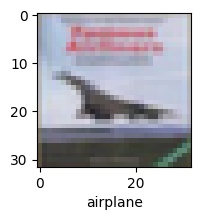

In [36]:
plot_sample(X_test, y_test, 3)

In [37]:
classes[y_classes[3]]

'airplane'